# 폐병 수술(Thoracic Surgery)
* 은닉층을 여러개 층으로
* 학습과정을 시각화

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ThoraricSurgery.csv to ThoraricSurgery (1).csv


In [ ]:
filename = list(uploaded.keys())[0]
filename

'ThoraricSurgery.csv'

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv(filename, header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,293,1,3.80,2.80,0,0,0,0,0,0,12,0,0,0,1,0,62,0
1,1,2,2.88,2.16,1,0,0,0,1,1,14,0,0,0,1,0,60,0
2,8,2,3.19,2.50,1,0,0,0,1,0,11,0,0,1,1,0,66,1
3,14,2,3.98,3.06,2,0,0,0,1,1,14,0,0,0,1,0,80,1
4,17,2,2.21,1.88,0,0,1,0,0,0,12,0,0,0,1,0,56,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df.values[:, :-1], df.values[:, -1], random_state = 2022, stratify = df.values[:, -1]
)

* 모델 정의

In [ ]:
import tensorflow as tf
seed = 2022
np.random.seed(seed)
tf.random.set_seed(seed)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential([
                    Dense(24, input_shape=(17,), activation = 'relu'),
                    Dense(8, activation = 'relu'),
                    Dense(1, activation = 'sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 24)                432       
                                                                 
 dense_1 (Dense)             (None, 8)                 200       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 641
Trainable params: 641
Non-trainable params: 0
_________________________________________________________________


* 모델 실행환경 설정

In [ ]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

* 모델 학습 : 과정을 시각화하려면 history를 정의해야 한다

In [ ]:
history = model.fit(X_train, y_train, validation_split = 0.2,
                    epochs = 50, batch_size = 20)

Epoch 1/50
15/15 [==============================] - 1s 15ms/step - loss: 7.3170 - accuracy: 0.8577 - val_loss: 5.3377 - val_accuracy: 0.8310
Epoch 2/50
15/15 [==============================] - 0s 5ms/step - loss: 3.4770 - accuracy: 0.8577 - val_loss: 1.5603 - val_accuracy: 0.7746
Epoch 3/50
15/15 [==============================] - 0s 4ms/step - loss: 1.2762 - accuracy: 0.6904 - val_loss: 1.1254 - val_accuracy: 0.7746
Epoch 4/50
15/15 [==============================] - 0s 3ms/step - loss: 0.7758 - accuracy: 0.8327 - val_loss: 0.8779 - val_accuracy: 0.7887
Epoch 5/50
15/15 [==============================] - 0s 4ms/step - loss: 0.6443 - accuracy: 0.8470 - val_loss: 0.7080 - val_accuracy: 0.7746
Epoch 6/50
15/15 [==============================] - 0s 4ms/step - loss: 0.5109 - accuracy: 0.8185 - val_loss: 0.6714 - val_accuracy: 0.8310
Epoch 7/50
15/15 [==============================] - 0s 4ms/step - loss: 0.6025 - accuracy: 0.8577 - val_loss: 0.6067 - val_accuracy: 0.7887
Epoch 8/50
15/15 [=

* 정확도 평가

In [ ]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 0.4746 - accuracy: 0.8475


[0.47463899850845337, 0.8474576473236084]

* 학습과정 시각화

In [ ]:
type(history.history)

dict

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

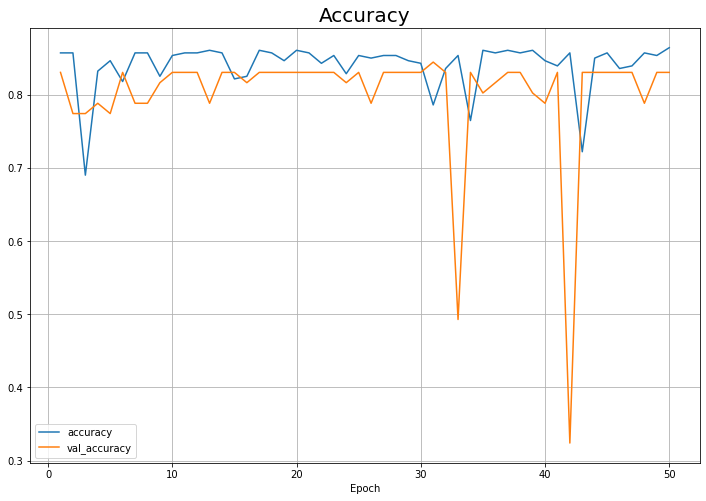

In [ ]:
xs = np.arange(1, len(acc) + 1)     # epoch가 50이므로 그것보다 1 더해준다
plt.figure(figsize=(12, 8))
plt.plot(xs, acc, ms = 5, label = 'accuracy')
plt.plot(xs, val_acc, ms = 5, label = 'val_accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.grid()
plt.title('Accuracy', fontsize = 20)
plt.show()

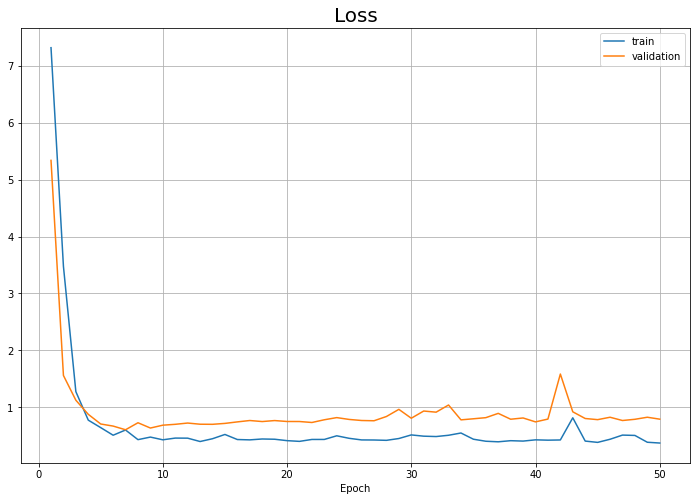

In [ ]:
xs = np.arange(1, len(acc) + 1)     # epoch가 50이므로 그것보다 1 더해준다
plt.figure(figsize=(12, 8))
plt.plot(xs, loss, ms = 10, label = 'train')
plt.plot(xs, val_loss, ms = 10, label = 'validation')
plt.xlabel('Epoch')
plt.legend()
plt.grid()
plt.title('Loss', fontsize = 20)
plt.show()

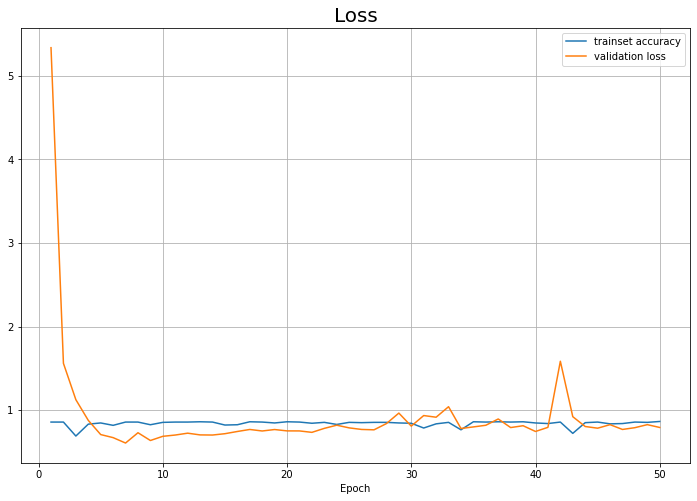

In [ ]:
# 실전에서는 accracy와 validation loss가 많이 그려짐

xs = np.arange(1, len(acc) + 1)     # epoch가 50이므로 그것보다 1 더해준다
plt.figure(figsize=(12, 8))
plt.plot(xs, acc, ms = 10, label = 'trainset accuracy')
plt.plot(xs, val_loss, ms = 10, label = 'validation loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid()
plt.title('Loss', fontsize = 20)
plt.show()

* validation loss가 가장 작을 때 학습을 종료시켜야 한다.
* 그 지점에서 학습을 끝내는 것을 Early stopping이라고 한다.

### Callback
* val_loss가 좋아지면 model을 save
* 이후 20~30번 더 반복했음에도 불구하고 val_loss가 개선되지 않을 경우 Early Stop